In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

from pandas.plotting import autocorrelation_plot
from scipy.optimize import curve_fit

In [10]:
path = '8.1'

### Esercizio 8.2
Lo scopo di questa eserciazione è stato quello di campionare la funzione d'onda del ground state di un sistema composto da una singola particella quantistica (in una dimensione) confinata nel seguente potenziale:
$$
V(x) = x^4 - \frac{5}{2}x^2
$$
Non essendo possible determinare analiticamente la funzione d'onda, è stato sviluppato un algoritmo variazionale per approssimare la soluzione analitica. 
L'esercizio si articola in più step e assume che la funzione d'onda cercata sia approssimata dalla seguente espressione:
$$
\Psi_T^{\sigma,\mu}(x) \propto e^{-\frac{(x-\mu)^2}{2\sigma^2}}+
                               e^{-\frac{(x+\mu)^2}{2\sigma^2}}
$$
Come prima cosa abbiamo scritto un algoritmo variazionale che potesse valutare l'energia del sistema data una funzione d'onda arbitraria cioè calcolasse il seguente integrale  


$$
\langle {\hat H} \rangle_T = 
\frac{\int dx \Psi^*_T(x) {\hat H} \Psi_T(x)}
{\int dx |\Psi_T(x)|^2} = 
\int dx \frac{|\Psi_T(x)|^2}{\int dx |\Psi_T(x)|^2} \frac{{\hat H} \Psi_T(x)}{\Psi_T(x)}
$$


L'algoritmo usa il metodo Metropolis per fare il campionamento. 

Successivamente abbiamo determinato i valori dei parametri $\mu$ e $\sigma$ che minimizzassero l'energia $\langle {\hat H} \rangle$ in modo da avere un'espressione approssimata della funzione d'onda del ground state. Per questa parte si è scelto di utilizzare un algoritmo di simulated annealing: il range di temperatura esplorato è $[0.6, 0.1]$ diminunedo ad ogni passo la temperatura di un $\Delta_T=0.0005$. Ad ogni valore di temperatura sono stati compiuti 100 passi montecarlo campionando (via metropolis) valori di $\sigma$ e $\mu$ e accettando i valori proposti in base alla stima dell'Hamiltoniana $\langle {\hat H} \rangle$. Ogni stima è stata fatta mediante l'algoritmo variazionale costruito in precedenza. Si è andati a selezionare i valori di $\sigma$ e $\mu$ a cui corrisponde l'energia minima. 

Sono stati trovati i seguenti valori:


$
\mu=0.699043
$

$
\sigma= 0.547852
$

Da ultimo abbiamo campionato $\langle {\hat H} \rangle$ con i valori ottimizati dei parametri facendo 1000 passi montecarlo divisi in 100 blocchi. Mostriamo di seguito il grafico dell'energia media in funzione dei blocchi con la relativa incertezza statistica e l'istogramma della densità di probabilità $|\Psi_T^{\sigma,\mu}(x)|^2$

In [25]:
energy = pd.read_csv(path + '/hamiltonian_opt', header = None, sep=",")

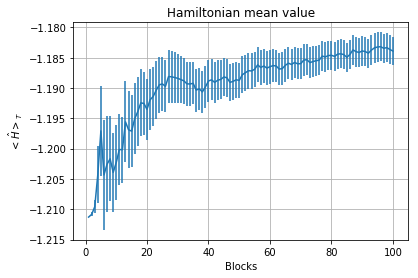

In [30]:
plt.errorbar(energy.iloc[:,0], energy.iloc[:,2], yerr=energy.iloc[:,3])
plt.title("Hamiltonian mean value")
plt.xlabel('Blocks')
plt.ylabel('$< \hat H >_T$')
plt.grid(True)

In [34]:
n_bins=50
probability = pd.read_csv(path + '/histogram', header = None, sep=",")
prob=list(probability.iloc[:,0])

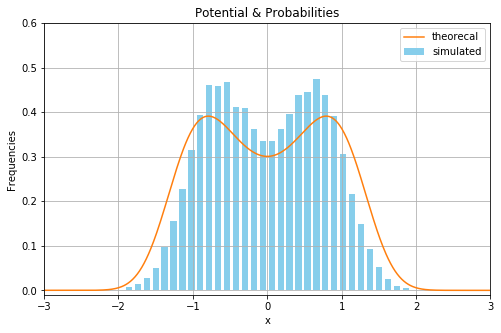

In [47]:
n_bins=50
probability = pd.read_csv(path + '/histogram', header = None, sep=",")
prob=list(probability.iloc[:,0])

def Vpot(x):
    return (x**2 - 2.5)*x**2
    #return 0.5*x**2

hbar = 1
m = 1
a = 10
N = 1000 # number of iterations

# Step sizes
x = np.linspace(-a/2, a/2, N)
dx = x[1] - x[0] # the step size
V = Vpot(x)

# The central differences method: f" = (f_1 - 2*f_0 + f_-1)/dx^2

CDiff = np.diag(np.ones(N-1),-1)-2*np.diag(np.ones(N),0)+np.diag(np.ones(N-1),1)
# np.diag(np.array,k) construct a "diagonal" matrix using the np.array
# The default is k=0. Use k>0 for diagonals above the main diagonal, 
# and k<0 for diagonals below the main diagonal

# Hamiltonian matrix
H = (-(hbar**2)*CDiff)/(2*m*dx**2) + np.diag(V)

# Compute eigenvectors and their eigenvalues
E,psi = np.linalg.eigh(H)

# Take the transpose & normalize
psi = np.transpose(psi)
psi = psi/np.sqrt(dx)

# Plot a few things
plt.figure(figsize=(8,5))
scale = 0.3

n, bins, patches = plt.hist(prob, n_bins, density=True, facecolor = "skyblue", range=(-3.0, 3.0),rwidth=0.7)
plt.plot(x,(psi[0])**2)
plt.title("Potential & Probabilities")
plt.xlabel("x")
plt.ylabel("Frequencies")
plt.grid(True)
plt.legend(['theorecal', 'simulated'])
plt.xlim((-3,3))
plt.ylim((-0.01,0.6))
plt.show()

### Esercizio 8.3

In questa ultima parte dell'esercizio abbiamo implemantato il codice PIGS fornitoci per campionare la funzione d'onda del sistema nello stato di minima energia. In particolare abbiamo usato come funzione di prova
- $\Psi_T(x)=1$
- $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$ con $\mu$ e $\sigma$ pari ai valori determinati nella prima parte della esercitazione.

Successivamente abbiamo usato il codice PIMC per campionare lo stato a minima energia aumentando la temperatura. Le simulazioni sono state fatte per i seguenti valori di temperatura: $[1.25, 5.25, 7.25, 10.25, 12.25, 17.25, 20.25]$

In [87]:
path2='QMC_1D'
prova = pd.read_csv(path2 + '/GS1/probability.dat', header = None, sep=" ")
prova2 = pd.read_csv(path2 + '/GS/probability.dat', header = None, sep=" ")

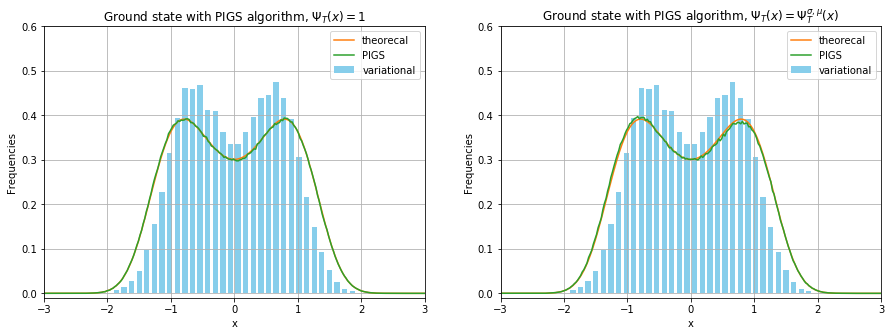

In [86]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
n, bins, patches = plt.hist(prob, n_bins, density=True, facecolor = "skyblue", range=(-3.0, 3.0),rwidth=0.7)
plt.plot(x,(psi[0])**2)
plt.plot(list(prova.iloc[:,0]), list(prova.iloc[:,1]))
plt.title("Ground state with PIGS algorithm, $\Psi_T(x)=1$")
plt.xlabel("x")
plt.ylabel("Frequencies")
plt.grid(True)
plt.legend(['theorecal', 'PIGS', 'variational'])
plt.xlim((-3,3))
plt.ylim((-0.01,0.6))

plt.subplot(1,2,2)
n, bins, patches = plt.hist(prob, n_bins, density=True, facecolor = "skyblue", range=(-3.0, 3.0),rwidth=0.7)
plt.plot(x,(psi[0])**2)
plt.plot(list(prova2.iloc[:,0]), list(prova2.iloc[:,1]))
plt.title("Ground state with PIGS algorithm, $\Psi_T(x) = \Psi_T^{\sigma,\mu}(x)$")
plt.xlabel("x")
plt.ylabel("Frequencies")
plt.grid(True)
plt.legend(['theorecal', 'PIGS', 'variational'])
plt.xlim((-3,3))
plt.ylim((-0.01,0.6))


plt.show()

Le simulazioni fatte con il programma PIGS sono in accordo con il modello teorico. Notiamo in oltre che la simulazione eseguita scegliendo come funzione d'onda di partenza la funzione costante $\Psi_T(x)=1$ converge meglio alla soluzione corretta.

Da ultimo mostriamo i grafici delle simulazioni fatte con il programma PIMC, per ogni temperatura scelta.

In [69]:
hist1 = pd.read_csv(path2 + '/T1pt25.dat', header = None, sep=" ")
hist2 = pd.read_csv(path2 + '/T5pt25.dat', header = None, sep=" ")
hist3 = pd.read_csv(path2 + '/T7pt25.dat', header = None, sep=" ")
hist4 = pd.read_csv(path2 + '/T10pt25.dat', header = None, sep=" ")
hist5 = pd.read_csv(path2 + '/T12pt25.dat', header = None, sep=" ")
hist6 = pd.read_csv(path2 + '/T17pt25.dat', header = None, sep=" ")
hist7 = pd.read_csv(path2 + '/T20pt25.dat', header = None, sep=" ")

In [70]:
pos_1=list(hist1.iloc[:,0])
freq_pimc_1=list(hist1.iloc[:,1])

pos_2=list(hist2.iloc[:,0])
freq_pimc_2=list(hist2.iloc[:,1])

pos_3=list(hist3.iloc[:,0])
freq_pimc_3=list(hist3.iloc[:,1])

pos_4=list(hist4.iloc[:,0])
freq_pimc_4=list(hist4.iloc[:,1])

pos_5=list(hist5.iloc[:,0])
freq_pimc_5=list(hist5.iloc[:,1])

pos_6=list(hist6.iloc[:,0])
freq_pimc_6=list(hist6.iloc[:,1])

pos_7=list(hist7.iloc[:,0])
freq_pimc_7=list(hist7.iloc[:,1])

(-0.01, 0.6)

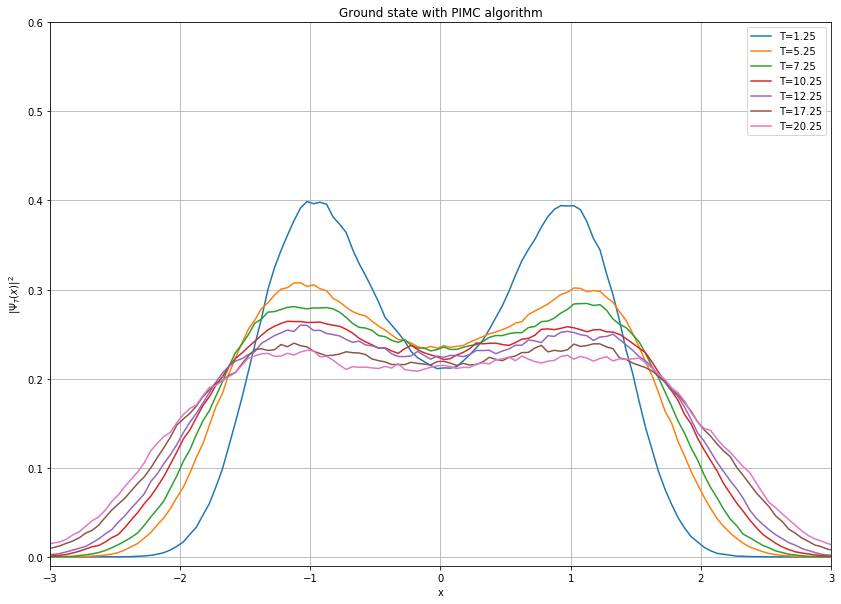

In [83]:
plt.figure(figsize = (14, 10))
plt.plot(pos_1, freq_pimc_1)
plt.plot(pos_2, freq_pimc_2)
plt.plot(pos_3, freq_pimc_3)
plt.plot(pos_4, freq_pimc_4)
plt.plot(pos_5, freq_pimc_5)
plt.plot(pos_6, freq_pimc_6)
plt.plot(pos_7, freq_pimc_7)
plt.title("Ground state with PIMC algorithm")
plt.xlabel("x")
plt.ylabel("$|\Psi_T(x)|^2$")
plt.grid(True)
plt.legend(['T=1.25', 'T=5.25', 'T=7.25', 'T=10.25', 'T=12.25', 'T=17.25', 'T=20.25'])
plt.xlim((-3,3))
plt.ylim((-0.01,0.6))